In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

import matplotlib.pyplot as plt


(ds_train, ds_test), ds_info = tfds.load(
    'emnist',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 3)),
  tf.keras.layers.Dense(28, activation='relu'),
  tf.keras.layers.Dense(38, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/697932 [00:00<?, ? examples/s]

Shuffling /Users/wortcook/tensorflow_datasets/emnist/byclass/incomplete.WE9BOZ_3.1.0/emnist-train.array_record…



***************************************************************
Failed to import ArrayRecord. This probably means that you are running on macOS or Windows. ArrayRecord currently does not work for your infrastructure, because it uses Python bindings in C++. We are actively working on this issue. Thanks for your understanding.
***************************************************************




ModuleNotFoundError: Failed to finalize writing of split "train": No module named 'array_record'

In [ ]:
#iterate through the test dataset and display the images and the model's predictions

# plt.figure(figsize=(10, 10))

# for i, (image, label) in enumerate(ds_test.unbatch().take(9)):
#     ax = plt.subplot(3, 3, i + 1)
#     ax.imshow(image.numpy().reshape(28, 28), cmap='gray')
#     label_pred = tf.argmax(model.predict(tf.expand_dims(image, 0)), axis=1).numpy()
#     ax.set_title(f'Actual: {label}, Predicted: {label_pred[0]}')
#     ax.axis('off')
    
# plt.show()

(784, 28)
(28,)
(28, 10)
(10,)


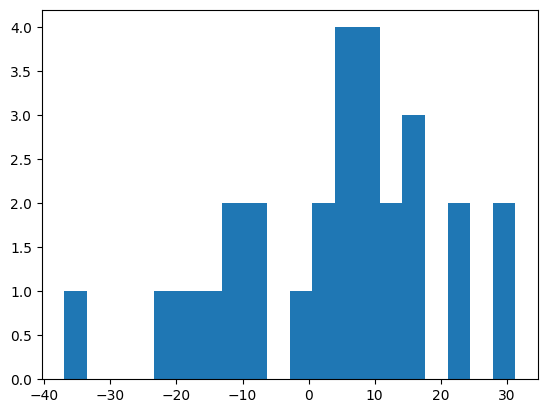

[-36.980316  -21.835081  -17.0727    -13.319954  -13.050501  -12.451862
  -8.249937   -7.2255363  -2.6409705   0.759763    2.1196575   4.020134
   5.017226    5.896869    6.22838     7.670247    8.588552    9.8945
  10.561674   10.972398   12.161644   14.798253   16.170794   16.285702
  21.38091    22.239752   30.148186   31.27651  ]


In [ ]:
#get the weights of the model
weights = model.get_weights()

#print the shapes of the weights
for w in weights:
    print(w.shape)
    
#sum the weights of the first layer per neuron
sums = np.sum(weights[0], axis=0)

#show histogram of the sums
plt.hist(sums, bins=20)
plt.show()

#print the sums
#sort the sums descending
sums = np.sort(sums)

print(sums)

